In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
import sys
parent_path = str(Path().joinpath('..').resolve())
sys.path.append(parent_path)

In [29]:
from triple_agent.parsing.replay.get_parsed_replays import get_parsed_replays
from triple_agent.reports.generation.plot_specs import AxisProperties, DataQueryProperties
from triple_agent.classes.missions import Missions
from triple_agent.classes.action_tests import ActionTest
from triple_agent.classes.outcomes import WinType, WINTYPE_PREFERRED_PIE_CHART_ORDER, WINTYPES_TO_COLORS
from collections import Counter
from triple_agent.reports.generation.generic_query import query
from triple_agent.reports.specific.game_outcomes import _categorize_outcomes
from triple_agent.classes.timeline import TimelineCategory

In [4]:
all_games = get_parsed_replays(lambda x: True)

In [70]:
len(all_games)

10358

In [74]:
def _did_cough_happen(game):
    for event in game.timeline:
        if (event.mission == Missions.Contact and event.action_test == ActionTest.Red) or (event.event == 'banana bread aborted.'):
            return True
        
    return False

In [114]:
def _find_bm_coughs(games):
    cough_times_remaining = []
    for game in games:
        c_times = []
        for event in game.timeline:
            if (event.mission == Missions.Contact and event.action_test == ActionTest.Red) or (event.event == 'banana bread aborted.'):
                c_times.append(event.elapsed_time)
                
            if (event.category == TimelineCategory.GameEnd):
                game_end_time = event.elapsed_time
        
        for time in c_times:
            cough_times_remaining.append(game_end_time - time)
    return cough_times_remaining

In [82]:
def _categorize_cough_response(games, data_dictionary):
    for game in games:
        last_cough_time = None
        game_end_time = None
        for event in game.timeline:
            if (event.mission == Missions.Contact and event.action_test == ActionTest.Red) or (event.event == 'banana bread aborted.'):
                last_cough_time = event.elapsed_time
            
            if (event.category == TimelineCategory.GameEnd):
                game_end_time = event.elapsed_time
        
        if game.win_type == WinType.SpyShot and last_cough_time is not None:
            if game_end_time - last_cough_time < 10:
                data_dictionary['Shot < 10s'] += 1
            else:
                data_dictionary['Shot >= 10s'] += 1
        else:
            data_dictionary[game.win_type.name] += 1

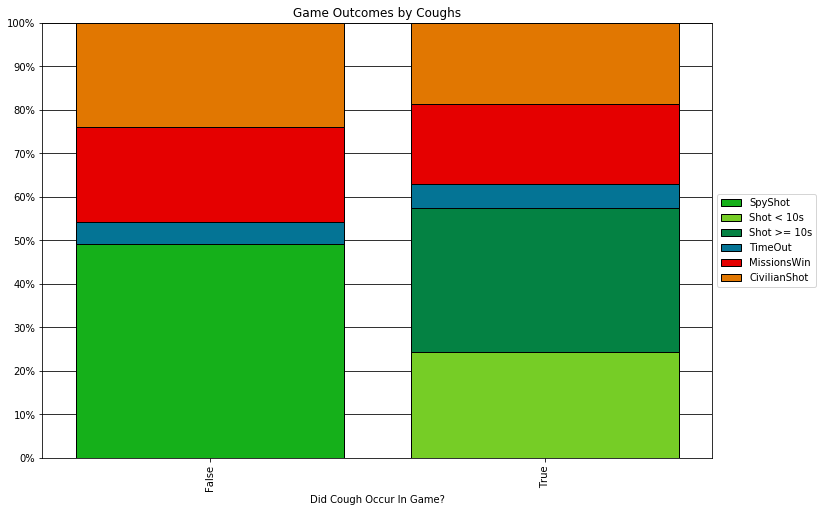

In [91]:
color_dict = {
            "SpyShot": "xkcd:green",
            "Shot < 10s": "xkcd:apple green",
            "Shot >= 10s": "xkcd:jungle green",
            "TimeOut": "xkcd:sea blue",
            "MissionsWin": "xkcd:red",
            "CivilianShot": "xkcd:pumpkin",
        }

data_properties = query(all_games,
      DataQueryProperties(
          query_function=_categorize_cough_response,
          groupby=_did_cough_happen,
          percent_normalized_data=True,
          data_stack_order = list(color_dict.keys()),
          data_color_dict = color_dict
    ),
    AxisProperties(y_axis_percentage=True, x_axis_label='Did Cough Occur In Game?', title='Game Outcomes by Coughs', savefig=r'C:/Users/az55845/Desktop/coughs.png')
)

In [88]:
data_properties.data

[[0.4911966577141152, 0],
 [0, 0.24262295081967214],
 [0, 0.33114754098360655],
 [0.049835869889585195, 0.05573770491803279],
 [0.22023276633840644, 0.18360655737704917],
 [0.23873470605789315, 0.18688524590163935]]

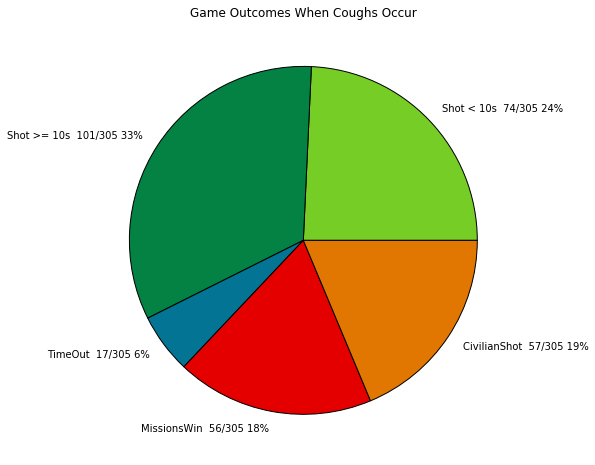

In [89]:
data_properties = query(filter(_did_cough_happen, all_games),
      DataQueryProperties(
          query_function=_categorize_cough_response,
          data_stack_order = list(color_dict.keys()),
          data_color_dict = color_dict
    ),
    AxisProperties(title='Game Outcomes When Coughs Occur')
)

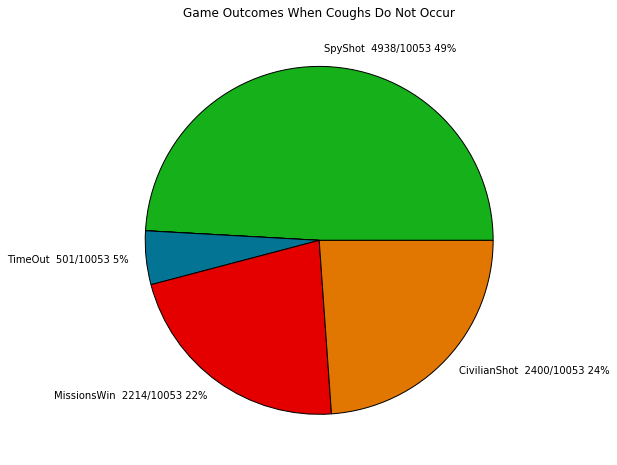

In [90]:
data_properties = query(filter(lambda x: not _did_cough_happen(x), all_games),
      DataQueryProperties(
          query_function=_categorize_cough_response,
          data_stack_order = list(color_dict.keys()),
          data_color_dict = color_dict
    ),
    AxisProperties(title='Game Outcomes When Coughs Do Not Occur')
)

In [115]:
sorted(_find_bm_coughs(filter(lambda x: _did_cough_happen(x) and x.win_type == WinType.MissionsWin, all_games)))

[0.7000000000000028,
 1.6999999999999886,
 1.8999999999999773,
 12.799999999999983,
 13.299999999999983,
 13.699999999999989,
 14.599999999999994,
 15.900000000000006,
 26.30000000000001,
 28.599999999999994,
 29.5,
 29.5,
 31.5,
 33.20000000000002,
 38.99999999999997,
 40.29999999999998,
 43.099999999999994,
 44.099999999999994,
 46.5,
 46.79999999999998,
 50.400000000000006,
 52.8,
 53.0,
 55.400000000000006,
 57.2,
 70.39999999999998,
 71.4,
 73.69999999999999,
 77.4,
 77.6,
 81.4,
 83.3,
 84.30000000000001,
 87.6,
 88.30000000000001,
 91.29999999999998,
 92.0,
 93.30000000000001,
 98.5,
 99.3,
 105.80000000000001,
 108.0,
 113.9,
 115.0,
 117.80000000000001,
 122.69999999999999,
 124.80000000000001,
 131.1,
 131.9,
 133.8,
 137.0,
 148.1,
 154.29999999999998,
 154.6,
 159.29999999999998,
 169.29999999999998,
 170.1,
 172.0,
 229.2,
 271.6]